In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [44]:
data = pd.read_csv('heart.csv')
data.head(40)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

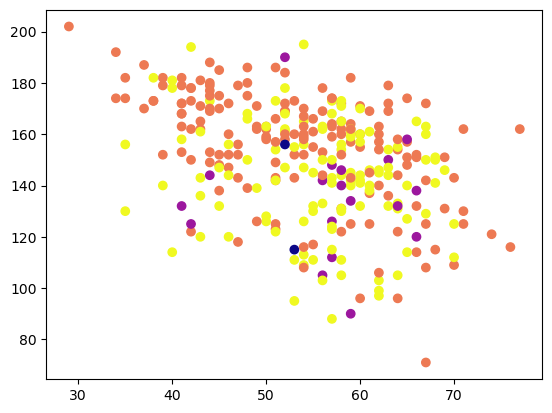

In [5]:
x_ = data['age']
y_ = data ['thalach']
label = data['thal']
plt.scatter(x_, y_, c= label, cmap='plasma')

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [8]:
x = data[['age','thalach']]
y = data['thal']
x.head()

,age,thalach
0,63,150
1,37,187
2,41,172
3,56,178
4,57,163


In [9]:
#praproses
scaler = StandardScaler()
x = scaler.fit_transform(x)
x[:5]

array([[ 0.9521966 ,  0.01544279],
       [-1.91531289,  1.63347147],
       [-1.47415758,  0.97751389],
       [ 0.18017482,  1.23989692],
       [ 0.29046364,  0.58393935]])

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=42)

In [11]:
kmeans.labels_

array([1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2,
       2, 1, 2, 1, 1, 0, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 2,
       1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 1, 2,
       1, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2, 2,
       1, 1, 0, 2, 1, 2, 2, 1, 2, 2, 0, 1, 2, 1, 2, 2, 2, 1, 2, 0, 1, 2,
       2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2, 1, 0, 1, 1,
       2, 0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 1,
       0, 1, 2, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 2,
       1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0, 2, 1, 1, 1, 2, 0, 1,
       0, 0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 2, 1, 2, 0, 1,
       0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 2, 0, 1, 1, 0, 2, 1, 0, 2, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 2, 1,

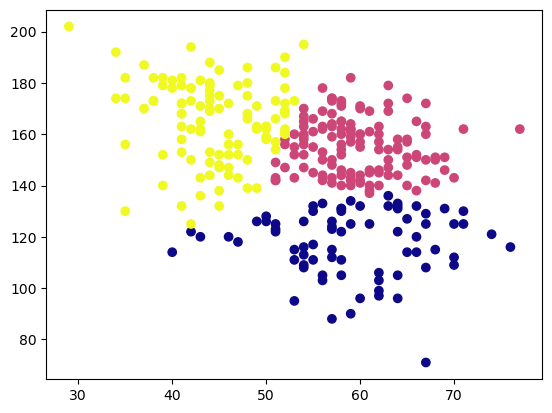

In [12]:
x_ = data['age']
y_ = data ['thalach']
label = kmeans.labels_
plt.scatter(x_, y_, c= label, cmap='plasma')

In [13]:
#evaluasi1
#sum of square errors

sse = []
index = range(1,10)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=30)
    kmeans.fit(x)
    sse_ = kmeans.inertia_
    sse.append(sse_)
    print(i, sse_)

1 606.0
2 328.94171707836057
3 218.64899482178893
4 168.54352380094494
5 131.37893647870143
6 112.52479134715338
7 95.84291102763626
8 84.2695185272353
9 75.16836677751306


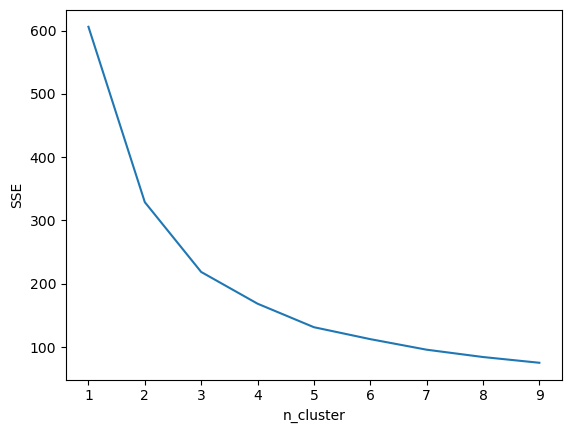

In [14]:
plt.plot(index, sse)
plt.xlabel('n_cluster')
plt.ylabel('SSE')
plt.show()

In [15]:
#evaluasi rand score
from sklearn import metrics
rand = []
index = range(1,10)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=30)
    kmeans.fit(x)
    rand_ = metrics.adjusted_rand_score(y, kmeans.labels_)
    rand.append(rand_)
    print(i, rand_)

1 0.0
2 0.05104215535866615
3 0.029833091530556247
4 0.020766693791470125
5 0.03198497898289657
6 0.02717955148497783
7 0.037162252266205904
8 0.03653119569756355
9 0.03482490405120652


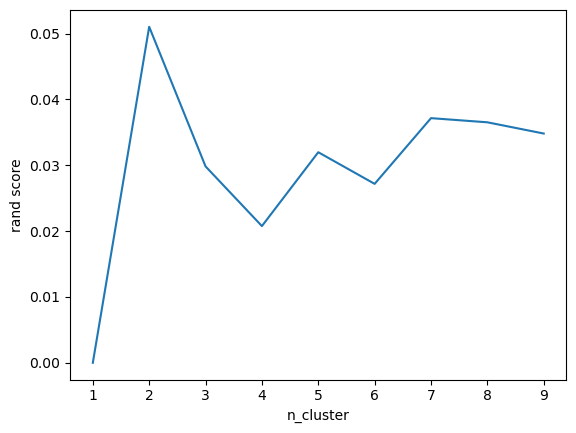

In [16]:
plt.plot(index, rand)
plt.xlabel('n_cluster')
plt.ylabel('rand score')
plt.show()

In [33]:
#Elbow Method
X = data.iloc[:, [0,7,12]].values

In [34]:
wcss = []
index = range(1,10)
for i in index:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss_ = kmeans.inertia_
    wcss.append(wcss_)
    print(i, wcss_)

1 183466.76567656768
2 75000.83455284551
3 46500.684605412964
4 35688.35321142805
5 28861.6684781038
6 23995.66665811278
7 20941.568633416864
8 18579.941649915974
9 16183.538156306007


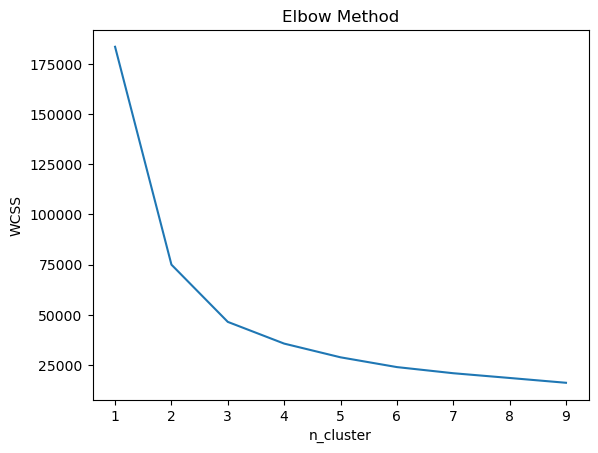

In [35]:
    plt.plot(index, wcss)
    plt.title('Elbow Method')
    plt.xlabel('n_cluster')
    plt.ylabel('WCSS')
    plt.show()

In [36]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [37]:
y_kmeans

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 1, 0, 1,
       1, 0, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 1, 0, 0, 2, 1, 2, 2, 1, 0, 0, 1, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1,
       1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 1, 0, 2, 2,
       1, 1, 2, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 0, 1, 0, 2, 1,
       2, 2, 2, 0, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 2, 1, 1, 2, 2, 1, 2, 0, 1, 2,
       1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,

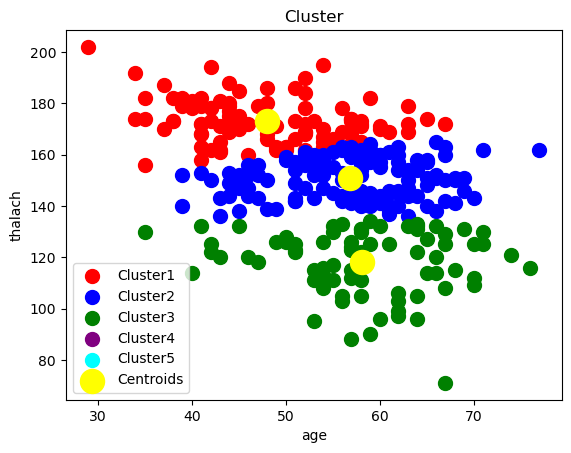

In [46]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1], s=100, c='red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1], s=100, c='blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1], s=100, c='green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3,1], s=100, c='purple', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4,1], s=100, c='cyan', label = 'Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c = 'yellow', label = 'Centroids')
plt.title('Cluster')
plt.xlabel('age')
plt.ylabel('thalach')
plt.legend()
plt.show()